(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8569 - loss: 0.5505 - val_accuracy: 0.9357 - val_loss: 0.2193
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9448 - loss: 0.1962 - val_accuracy: 0.9580 - val_loss: 0.1512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9611 - loss: 0.1388 - val_accuracy: 0.9629 - val_loss: 0.1241
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9686 - loss: 0.1086 - val_accuracy: 0.9702 - val_loss: 0.0990
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9730 - loss: 0.0911 - val_accuracy: 0.9699 - val_loss: 0.0958
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9768 - loss: 0.0814 - val_accuracy: 0.9729 - val_loss: 0.0880
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9799 - loss: 0.0705 - val_accuracy: 0.9733 - val_loss: 0.0829
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━

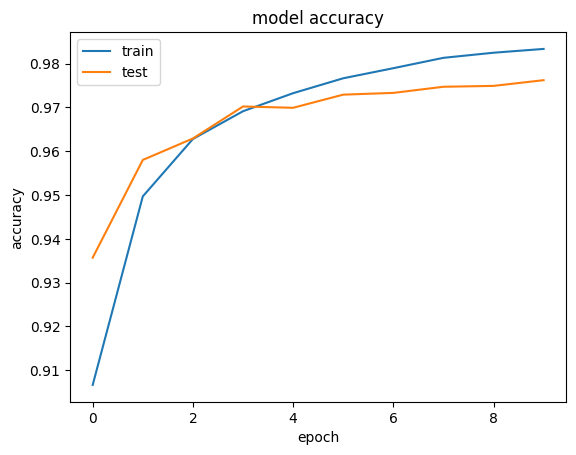

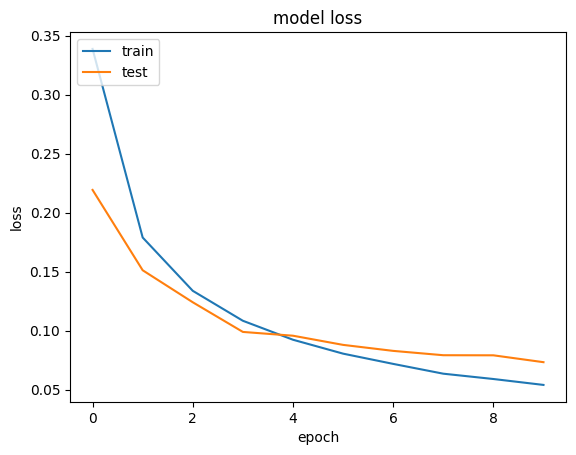

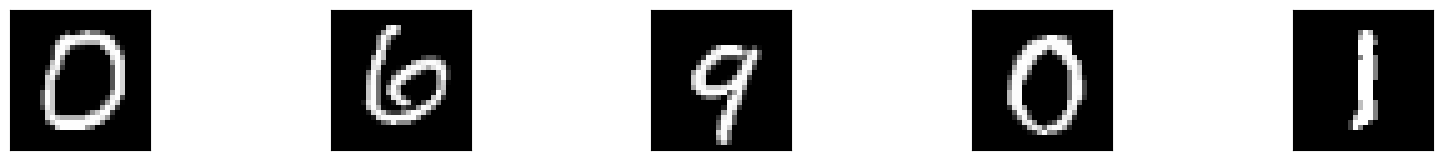

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([0, 6, 9, 0, 1])

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_train.shape)
print(x_test.shape)

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

from tensorflow.keras.utils import to_categorical
history=model.fit(
  x_train,
  to_categorical(y_train),
  epochs=10,
  validation_data=(x_test, to_categorical(y_test)),
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

predictions = model.predict(x_test[10:15])

np.argmax(predictions, axis=1)